# Unit 5 - Financial Planning

In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import json
from alpaca_trade_api.rest import REST, TimeFrame
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [ ]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
print(json.dumps(btc_data, indent=4))
btc_price = btc_data["data"]["1"]["quotes"]["USD"]["price"]

In [ ]:
# Fetch current ETH price
eth_data = requests.get(eth_url).json()
print(json.dumps(eth_data, indent=4))
eth_price = eth_data["data"]["1027"]["quotes"]["USD"]["price"]

In [8]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $49716.00
The current value of your 5.3 ETH is $15193.72


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [9]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [10]:
# Set Alpaca API key and secret
alpaca_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
tradeapi = REST(alpaca_key, alpaca_secret_key)

In [12]:
# Get current closing prices for AGG and SPY
def get_company(ticker, start, end, tradeapi):
        return tradeapi.get_bars(
        ticker,
        TimeFrame.Day,
        start,
        end
    ).df

my_df = {
    "AGG":get_company("AGG", "2022-01-01", "2022-03-18", tradeapi),
    "SPY":get_company("SPY", "2022-01-01", "2022-03-18", tradeapi)
}
# Preview DataFrame
full_data = pd.concat(my_df.values(), keys=my_df.keys(), axis="columns")
full_data.tail()

AGG                                       \
                             open     high       low   close    volume   
timestamp                                                                
2022-03-14 04:00:00+00:00  107.78  107.816  107.3600  107.36   9492508   
2022-03-15 04:00:00+00:00  107.83  107.920  107.4300  107.60  13841071   
2022-03-16 04:00:00+00:00  107.63  107.730  107.0032  107.68  15809171   
2022-03-17 04:00:00+00:00  107.87  108.060  107.7300  107.86   8005258   
2022-03-18 04:00:00+00:00  107.95  108.140  107.9203  108.10   7800354   

                                                       SPY                  \
                          trade_count        vwap     open    high     low   
timestamp                                                                    
2022-03-14 04:00:00+00:00       34364  107.571987  420.975  424.55  415.79   
2022-03-15 04:00:00+00:00       33852  107.622094  419.900  426.84  418.42   
2022-03-16 04:00:00+00:00       43366  107.553629  429.940  435.68  424.80   
2022-03-17 04:00:00+00:00       24093  107.889900  433.700  441.07  433.19   
2022-03-18 04:00:00+00:00       23567  108.060585  438.200  444.86  437.22   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2022-03-14 04:00:00+00:00  417.00   91930409      863515  419.203845  
2022-03-15 04:00:00+00:00  426.17  104219651      920659  422.752423  
2022-03-16 04:00:00+00:00  435.62  138130298     1344164  431.339744  
2022-03-17 04:00:00+00:00  441.07  100157174      784018  437.706981  
2022-03-18 04:00:00+00:00  444.52  102327793      790235  441.458916

In [27]:
# Pick AGG and SPY close prices
closing_prices = pd.DataFrame()
closing_prices["AGG"] = full_data["AGG"]["close"]
closing_prices["SPY"] = full_data["SPY"]["close"]
closing_prices.index = closing_prices.index.date
agg_close_price = closing_prices["AGG"][-1]
spy_close_price = closing_prices["SPY"][-1]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $108.1
Current SPY closing price: $444.52


In [28]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")

The current value of your 50 SPY shares is $22226.00
The current value of your 200 AGG shares is $21620.00


### Savings Health Analysis

In [40]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
shares = my_agg_value + my_spy_value

# Create savings DataFrame
data = [["shares",shares],["crypto",crypto]]
savings_df = pd.DataFrame(data, columns=['asset','current_value'])
savings_df.set_index(savings_df["asset"],inplace=True)
savings_df.drop(columns=["asset"],inplace=True)


# Display savings DataFrame
display(savings_df)

,current_value
asset,
shares,43846.000
crypto,64909.722


array([<AxesSubplot:ylabel='current_value'>], dtype=object)

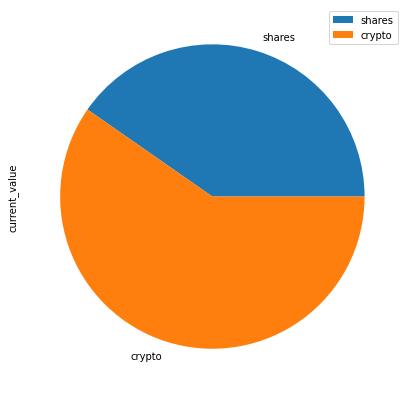

In [44]:
# Plot savings pie chart
savings_df.plot.pie(subplots=True,figsize=(7,7))

In [59]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = savings_df["current_value"].sum()


# Validate saving health
if total_savings > emergency_fund:
    print(f"Congratulations! Your total savings of ${total_savings:0.2f} is enough money in case of an emergency.")
elif total_savings == emergency_fund:
    print(f"Congratulations! You've reached your savings goal of ${emergency_fund:0.2f}")
elif total_savings < emergency_fund:
    print(f"Almost there. You have ${(emergency_fund - total_savings):0.2f} more to save to reach your goal of ${emergency_fund:0.2f}")


Congratulations! Your total savings of $108755.72 is enough money in case of an emergency.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [60]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-03-18', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-03-18', tz='America/New_York').isoformat()

In [62]:
# Get 5 years' worth of historical data for AGG and SPY
stock_data_df = {
    "AGG":get_company("AGG", start_date, end_date, tradeapi),
    "SPY":get_company("SPY", start_date, end_date, tradeapi)
}
# Preview DataFrame
full_stock_data = pd.concat(stock_data_df.values(), keys=stock_data_df.keys(), axis="columns")


# Display sample data
full_stock_data.head()

AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2017-03-20 04:00:00+00:00  107.86  108.05  107.8401  108.05  1635249   
2017-03-21 04:00:00+00:00  107.93  108.27  107.9300  108.27  2049680   
2017-03-22 04:00:00+00:00  108.44  108.54  108.3600  108.42  2643641   
2017-03-23 04:00:00+00:00  108.44  108.51  108.2635  108.45  2071485   
2017-03-24 04:00:00+00:00  108.35  108.51  108.3100  108.36  3374871   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2017-03-20 04:00:00+00:00        8198  107.961544  237.03  237.36  236.32   
2017-03-21 04:00:00+00:00       12024  108.175725  237.49  237.61  233.58   
2017-03-22 04:00:00+00:00       11111  108.455049  233.78  234.61  233.05   
2017-03-23 04:00:00+00:00       10901  108.417635  234.01  235.34  233.60   
2017-03-24 04:00:00+00:00       11229  108.398485  234.35  235.04  232.96   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2017-03-20 04:00:00+00:00  236.74   52536979      169612  236.909398  
2017-03-21 04:00:00+00:00  233.76  131809275      443599  234.853857  
2017-03-22 04:00:00+00:00  234.25   97569204      307469  233.932509  
2017-03-23 04:00:00+00:00  233.94  100410277      333903  234.388790  
2017-03-24 04:00:00+00:00  233.88  112504853      359600  234.080978

In [68]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_8020 = MCSimulation(
    portfolio_data=full_stock_data,
    weights= [0.80, 0.20],
    num_simulation= 1000,
    num_trading_days= 252 * 30
)

In [69]:
# Printing the simulation input data
MC_8020.portfolio_data.head()

AGG                                     \
                             open    high       low   close   volume   
timestamp                                                              
2017-03-20 04:00:00+00:00  107.86  108.05  107.8401  108.05  1635249   
2017-03-21 04:00:00+00:00  107.93  108.27  107.9300  108.27  2049680   
2017-03-22 04:00:00+00:00  108.44  108.54  108.3600  108.42  2643641   
2017-03-23 04:00:00+00:00  108.44  108.51  108.2635  108.45  2071485   
2017-03-24 04:00:00+00:00  108.35  108.51  108.3100  108.36  3374871   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-03-20 04:00:00+00:00        8198  107.961544          NaN  237.03   
2017-03-21 04:00:00+00:00       12024  108.175725     0.002036  237.49   
2017-03-22 04:00:00+00:00       11111  108.455049     0.001385  233.78   
2017-03-23 04:00:00+00:00       10901  108.417635     0.000277  234.01   
2017-03-24 04:00:00+00:00       11229  108.398485    -0.000830  234.35   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2017-03-20 04:00:00+00:00  237.36  236.32  236.74   52536979      169612   
2017-03-21 04:00:00+00:00  237.61  233.58  233.76  131809275      443599   
2017-03-22 04:00:00+00:00  234.61  233.05  234.25   97569204      307469   
2017-03-23 04:00:00+00:00  235.34  233.60  233.94  100410277      333903   
2017-03-24 04:00:00+00:00  235.04  232.96  233.88  112504853      359600   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-03-20 04:00:00+00:00  236.909398          NaN  
2017-03-21 04:00:00+00:00  234.853857    -0.012588  
2017-03-22 04:00:00+00:00  233.932509     0.002096  
2017-03-23 04:00:00+00:00  234.388790    -0.001323  
2017-03-24 04:00:00+00:00  234.080978    -0.000256

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_8020.calc_cumulative_return()

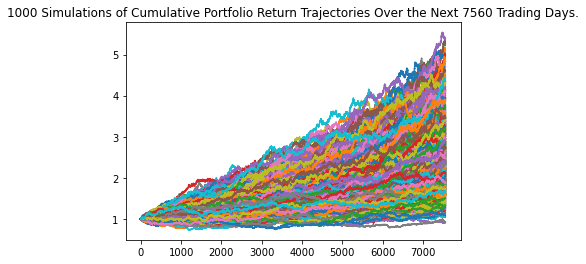

In [71]:
# Plot simulation outcomes
mc_line_plot = MC_8020.plot_simulation()

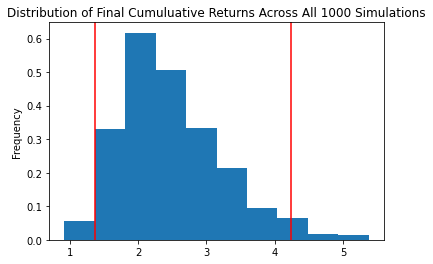

In [72]:
# Plot probability distribution and confidence intervals
mc_dist_plot = MC_8020.plot_distribution()

### Retirement Analysis

In [74]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_8020_tbl = MC_8020.summarize_cumulative_return()

# Print summary statistics
print(mc_8020_tbl)

count           1000.000000
mean               2.484860
std                0.747220
min                0.921293
25%                1.940354
50%                2.366129
75%                2.879821
max                5.374790
95% CI Lower       1.366354
95% CI Upper       4.235110
Name: 7560, dtype: float64


c:\Users\altma\OneDrive\Documents\FinTechBootCamp\homework\api-financial-planning\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [75]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
mc_8020_ci_lower = round(mc_8020_tbl[8]*initial_investment,2)
mc_8020_ci_upper = round(mc_8020_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${mc_8020_ci_lower} and ${mc_8020_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $27327.09 and $84702.2


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [76]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
mc_8020_ci_lower = round(mc_8020_tbl[8]*initial_investment,2)
mc_8020_ci_upper = round(mc_8020_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${mc_8020_ci_lower} and ${mc_8020_ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $40990.63 and $127053.29


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001799,1.000245,1.006243,0.995742,1.003219,0.998395,0.997985,1.004253,1.002497,0.998947,...,1.007121,1.004291,1.000334,1.000876,0.998973,1.001375,0.996477,1.002103,1.005063,0.995521
2,0.998289,1.000243,1.004284,0.996554,1.004502,0.993317,0.996037,1.010316,1.000850,0.996382,...,1.007016,1.003709,0.999542,1.001450,1.004142,1.004022,0.996702,1.004359,1.009205,0.999000
3,1.002639,0.997279,1.008339,0.992870,0.998657,0.989041,0.994189,1.010062,0.999200,0.999132,...,1.004156,1.002288,1.003976,0.994908,1.008989,1.004545,0.995074,1.010488,1.011124,1.002626
4,1.008853,0.996292,1.002813,0.995244,0.996794,0.990576,0.999322,1.010897,0.989222,0.995257,...,1.000057,1.007349,1.006909,0.990823,1.013085,1.002427,0.996293,1.007081,1.010369,0.998654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.438618,0.926659,1.048662,1.101424,1.134443,1.200987,1.347489,1.257520,1.428939,1.194429,...,1.104654,1.273680,1.276718,1.297344,1.229379,1.295593,1.501864,1.198438,1.386161,1.426163
1257,1.441785,0.926428,1.048574,1.104941,1.137374,1.204559,1.360843,1.260661,1.429710,1.201055,...,1.107447,1.269262,1.265880,1.296800,1.227049,1.297884,1.510874,1.190802,1.388448,1.427391
1258,1.444675,0.931714,1.053040,1.110206,1.140592,1.199869,1.358605,1.254728,1.426409,1.207420,...,1.101690,1.274683,1.281527,1.303255,1.227517,1.294870,1.503567,1.191945,1.388434,1.441467
1259,1.443488,0.934065,1.049921,1.108998,1.142538,1.203844,1.363563,1.254192,1.425030,1.213366,...,1.103902,1.276629,1.275813,1.296929,1.222773,1.285521,1.498580,1.192940,1.397786,1.440244


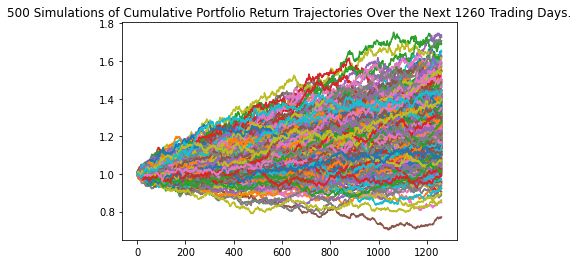

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

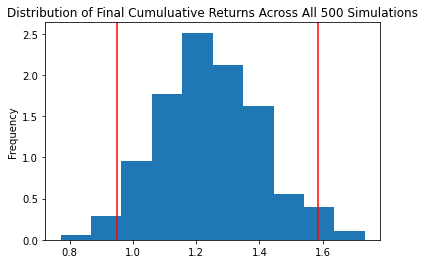

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.245905
std               0.160008
min               0.771559
25%               1.140795
50%               1.232555
75%               1.352284
max               1.733421
95% CI Lower      0.951523
95% CI Upper      1.586592
Name: 1260, dtype: float64


In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57091.37 and $95195.55


### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004461,1.003269,0.998934,0.996767,1.000906,0.999279,0.995262,1.005752,0.993466,0.993655,...,1.001427,1.004350,0.996932,0.996844,0.997507,1.003457,0.998736,1.001195,0.999904,1.010218
2,1.007901,1.003304,0.993812,0.999973,1.000910,1.002347,0.996311,1.007234,0.993550,0.991021,...,0.997379,1.001952,0.998124,0.998063,1.001733,1.000273,0.994865,1.000109,0.994648,1.007838
3,1.007532,1.001077,0.990963,0.998339,1.001779,1.003653,0.994439,1.012230,0.999170,0.996484,...,0.995265,1.001745,0.995332,1.003023,1.003800,0.999755,0.997616,1.004730,0.993391,1.010444
4,1.020339,1.005743,0.991869,0.998218,1.005630,1.008717,0.987764,1.012750,0.999227,0.996474,...,0.999028,1.004730,0.995357,1.000204,1.008738,0.999273,0.999426,1.003776,0.991478,1.013379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.616922,1.761703,1.143430,1.687801,1.743826,1.174891,1.514199,2.447129,1.589765,1.570578,...,1.316494,1.863650,1.727959,1.411033,1.804671,1.500605,1.413278,1.552375,1.318340,1.960015
2517,1.620285,1.769184,1.145132,1.695693,1.742878,1.175745,1.517697,2.441471,1.586174,1.560826,...,1.318463,1.857860,1.724003,1.409092,1.810136,1.499466,1.413210,1.552539,1.316872,1.956776
2518,1.622141,1.771927,1.149019,1.691589,1.739420,1.178965,1.522624,2.444413,1.580680,1.566154,...,1.317147,1.864694,1.727503,1.419561,1.821212,1.492831,1.412283,1.556659,1.318842,1.961271
2519,1.628885,1.770207,1.149670,1.703935,1.738053,1.182429,1.519485,2.441360,1.565663,1.576607,...,1.307985,1.858986,1.728039,1.430017,1.814690,1.496851,1.409284,1.562660,1.324798,1.964190


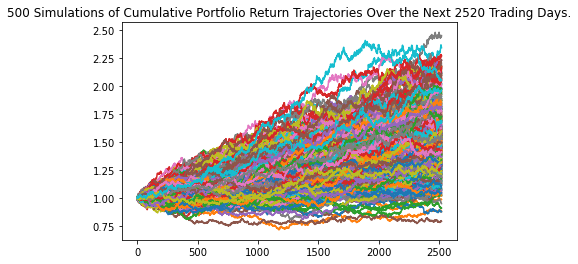

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

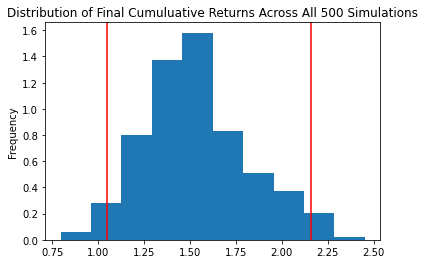

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.537014
std               0.282192
min               0.795263
25%               1.339641
50%               1.523799
75%               1.693927
max               2.451787
95% CI Lower      1.049781
95% CI Upper      2.159935
Name: 2520, dtype: float64


In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62986.85 and $129596.12
